In [4]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [36]:
# Reading Whale Returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# Read CSV into DataFrame
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date",  infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [37]:
# Check for null
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [38]:
# Determining number of null values
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON &amp; CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [39]:
# Drop null values
whale_returns_df.dropna(inplace=True)
whale_returns_df
# Check for null values again
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON &amp; CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [26]:
### Reading and cleaning Algorithmic Daily Returns

In [56]:
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
algo_returns_df.dropna(inplace=True)
algo_returns_df
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [1]:
### S&P 500 Returns

In [41]:
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [42]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [46]:
# Fix Data Types 
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', '')
sp500_history_df["Close"] = sp500_history_df["Close"].astype(float)

AttributeError: Can only use .str accessor with string values!

In [47]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [48]:
# Calculate Daily Returns 
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [51]:
# Drop nulls 
daily_returns.dropna(inplace=True)
daily_returns
daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [53]:
# Rename Column to "S&P 500"
daily_returns.rename(columns = {'Close':'S&P 500'}, inplace=True)
daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [57]:
### Combine Whale, Algorithmic, and S&P 500 Returns
column_appended_data = pd.concat([whale_returns_df, algo_returns_df, daily_returns], axis="columns", join="inner")
column_appended_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [33]:
### Portfolio Analysis

In [69]:
## Performance
# Calculate and plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500?


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9626c28370&gt;

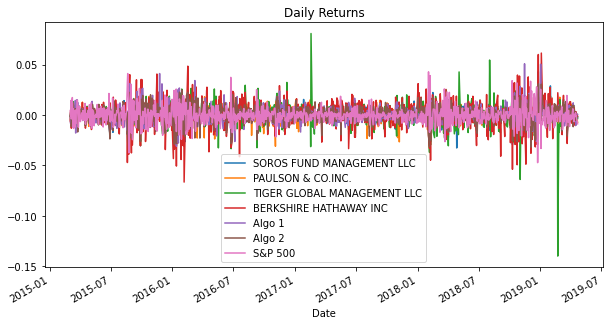

In [71]:
# Plot Daily Returns
column_appended_data.plot(figsize=(10,5), title="Daily Returns")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9626e2a550&gt;

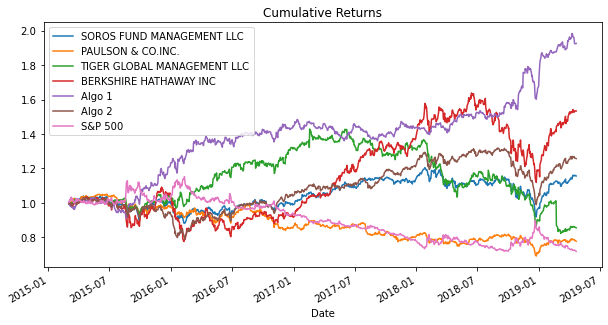

In [74]:
# Plot cumulative returns
cumulative_returns = (1 + column_appended_data).cumprod() 
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

In [64]:
## Risk

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9627c735b0&gt;

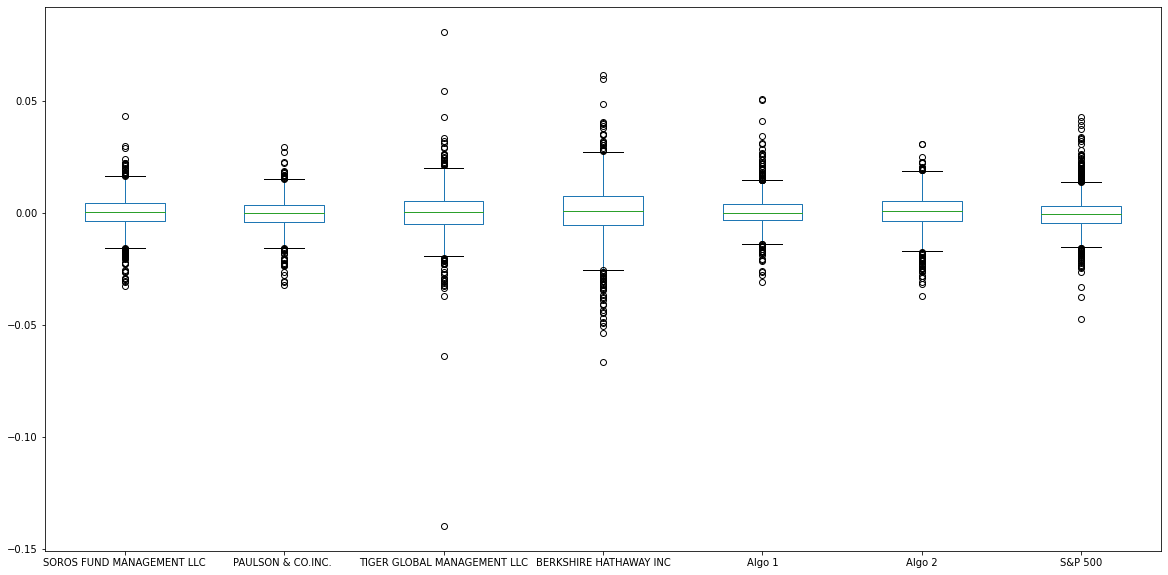

In [78]:
# Box plot to visually show risk
column_appended_data.boxplot(figsize=(20,10), grid=False)

In [80]:
# Daily standard deviations
column_appended_data.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON &amp; CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&amp;P 500                        0.008587
dtype: float64

In [85]:
# calculate the standard deviation for each portfolio
# which portfolios are riskier than the S&P 500?
sp500_dev = column_appended_data["S&P 500"].std()
column_appended_data.std()>=sp500_dev

SOROS FUND MANAGEMENT LLC      False
PAULSON &amp; CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&amp;P 500                         True
dtype: bool

In [97]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = column_appended_data.rolling(window=252).std()
annualized_std.std()

SOROS FUND MANAGEMENT LLC      0.001624
PAULSON &amp; CO.INC.              0.000796
TIGER GLOBAL MANAGEMENT LLC    0.001564
BERKSHIRE HATHAWAY INC         0.002743
Algo 1                         0.001887
Algo 2                         0.001685
S&amp;P 500                        0.002140
dtype: float64

In [87]:
## Rolling Statistics

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f96296ca3d0&gt;

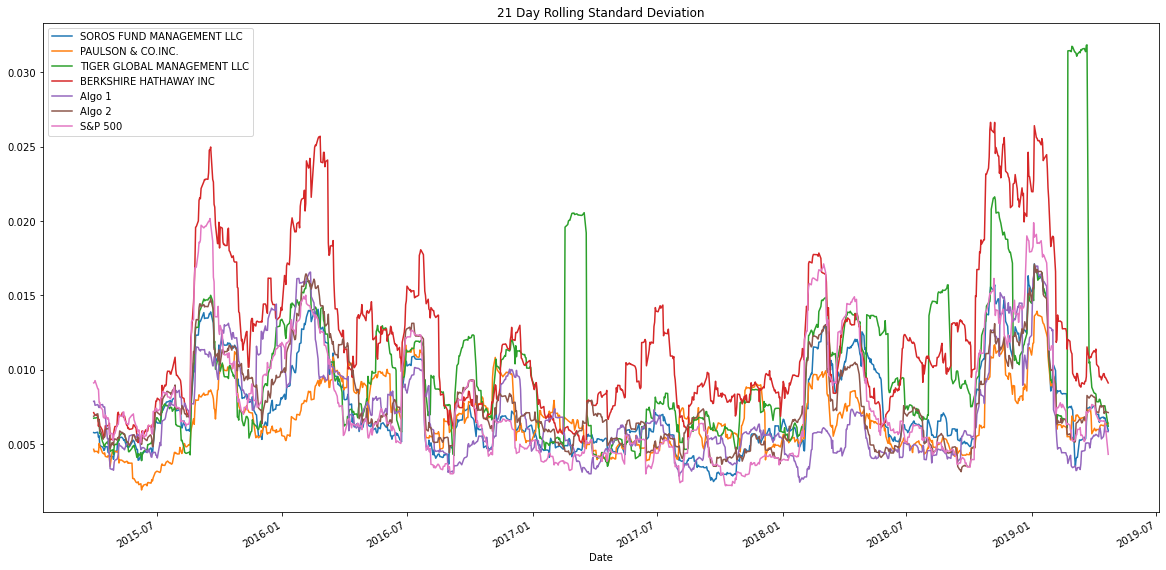

In [99]:
# calculate and plot the rolling standard deviation for the SP 500 and whale portfolios using a 21 trading day window
rolling_std = column_appended_data.rolling(window=21).std()
rolling_std.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [100]:
# construct a correlation table
price_correlation = column_appended_data.corr()
price_correlation.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9628e14a60&gt;

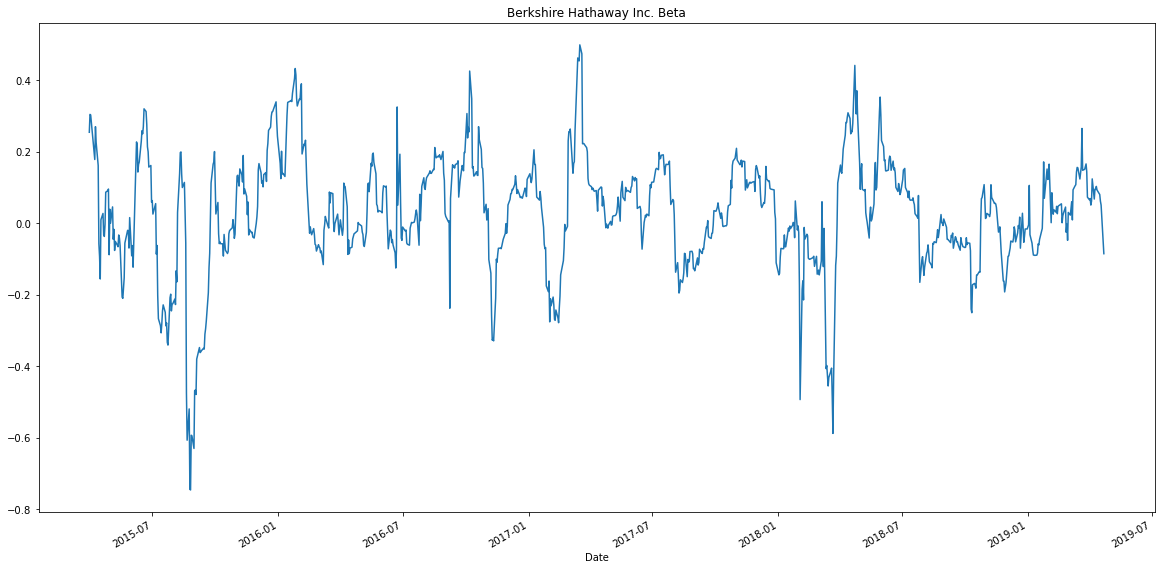

In [124]:
# calculate Beta for a single portfolio compare to the total market (SP 500)
covariance = column_appended_data['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(column_appended_data['S&P 500'])
variance = column_appended_data['BERKSHIRE HATHAWAY INC'].rolling(21).var()
berkshire_beta = covariance/variance
berkshire_beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc. Beta")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9626db76d0&gt;

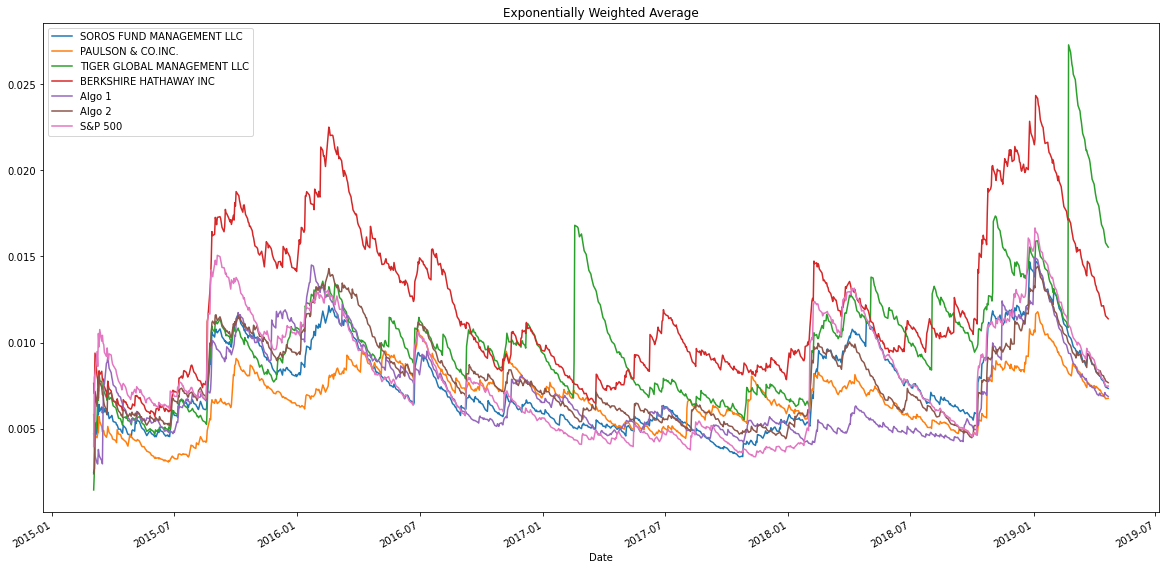

In [121]:
# calculate a rolling window using the exponentially weighted moving avergae
column_ewm = column_appended_data.ewm(halflife=21).std()
column_ewm.plot(figsize=(20,10), title="Exponentially Weighted Average")

In [125]:
## Sharpe Ratios

In [129]:
# Calculate annualized sharpe ratios
sharpe_ratio = column_appended_data.mean()/column_appended_data.std()
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.021600
PAULSON &amp; CO.INC.             -0.030957
TIGER GLOBAL MANAGEMENT LLC   -0.008201
BERKSHIRE HATHAWAY INC         0.038221
Algo 1                         0.086276
Algo 2                         0.030510
S&amp;P 500                       -0.032668
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f962c523250&gt;

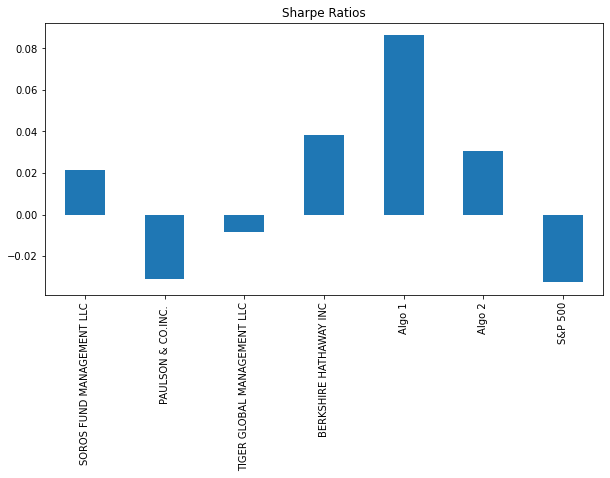

In [132]:
# visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(10,5), title="Sharpe Ratios")

In [128]:
## Portfolio Returns

In [139]:
# Reading Walmart Returns
walmart_returns_csv = Path("../Resources/WMT_Historical.csv")
# Read CSV into DataFrame
walmart_returns_df = pd.read_csv(walmart_returns_csv, index_col="Date",  infer_datetime_format=True, parse_dates=True)
walmart_returns_df.rename(columns = {'Close':'Walmart'}, inplace=True)
walmart_returns_df.sort_index()
walmart_returns_df.head()

,Walmart
Date,
2018-01-02,98.59
2018-01-03,99.45
2018-01-04,99.54
2018-01-05,100.13
2018-01-08,101.61


In [140]:
# Reading Tyson Returns
tyson_returns_csv = Path("../Resources/TSN_Historical.csv")
# Read CSV into DataFrame
tyson_returns_df = pd.read_csv(tyson_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tyson_returns_df.rename(columns = {'Close':'Tyson'}, inplace=True)
tyson_returns_df.sort_index()
tyson_returns_df.head()

,Tyson
Date,
2018-01-02,80.62
2018-01-03,79.71
2018-01-04,80.22
2018-01-05,80.83
2018-01-08,81.71


In [141]:
# Reading JBHunt Returns
jbhunt_returns_csv = Path("../Resources/JBHT_Historical.csv")
# Read CSV into DataFrame
jbhunt_returns_df = pd.read_csv(jbhunt_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
jbhunt_returns_df.rename(columns = {'Close':'J.B. Hunt'}, inplace=True)
jbhunt_returns_df.sort_index()
jbhunt_returns_df.head()

,J.B. Hunt
Date,
2018-01-02,116.09
2018-01-03,116.87
2018-01-04,116.89
2018-01-05,116.27
2018-01-08,118.03


In [142]:
# Concatenate all DataFrames into a single DataFrame
combined_stock_data = pd.concat([walmart_returns_df, tyson_returns_df, jbhunt_returns_df], axis="columns", join="inner")
combined_stock_data

,Walmart,Tyson,J.B. Hunt
Date,,,
2018-01-02,98.59,80.62,116.09
2018-01-03,99.45,79.71,116.87
2018-01-04,99.54,80.22,116.89
2018-01-05,100.13,80.83,116.27
2018-01-08,101.61,81.71,118.03
...,...,...,...
2019-12-23,119.03,91.39,116.39
2019-12-24,119.51,91.15,116.56
2019-12-26,119.52,91.30,116.75


In [154]:
# Reset the index
combined_stock_data.reset_index(drop=True)
combined_stock_data.head()

,Walmart,Tyson,J.B. Hunt
Date,,,
2018-01-02,98.59,80.62,116.09
2018-01-03,99.45,79.71,116.87
2018-01-04,99.54,80.22,116.89
2018-01-05,100.13,80.83,116.27
2018-01-08,101.61,81.71,118.03


In [144]:
# Pivot so that each columnn of prices represents a unique symbol - Not sure what it's asking?

In [155]:
# Drop nulls
combined_stock_data.dropna(inplace=True)
combined_stock_data.head()

,Walmart,Tyson,J.B. Hunt
Date,,,
2018-01-02,98.59,80.62,116.09
2018-01-03,99.45,79.71,116.87
2018-01-04,99.54,80.22,116.89
2018-01-05,100.13,80.83,116.27
2018-01-08,101.61,81.71,118.03


In [159]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [158]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = combined_stock_data.dot(weights)
portfolio_returns.head()

Date
2018-01-02     98.433333
2018-01-03     98.676667
2018-01-04     98.883333
2018-01-05     99.076667
2018-01-08    100.450000
dtype: float64

In [148]:
## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [160]:
# Add your "Custom" portfolio to the larger datafram of fund returns
all_stock_data = pd.concat([combined_stock_data, column_appended_data], axis="columns", join="inner")
all_stock_data.head()

,Walmart,Tyson,J.B. Hunt,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2018-01-02,98.59,80.62,116.09,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,-0.006358
2018-01-03,99.45,79.71,116.87,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,-0.004012
2018-01-04,99.54,80.22,116.89,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.006985
2018-01-05,100.13,80.83,116.27,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001660
2018-01-08,101.61,81.71,118.03,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001301


In [161]:
# Only compare dates where return data exists for all the stocks (Drop nulls)
all_stock_data.dropna(inplace=True)
all_stock_data.head()

,Walmart,Tyson,J.B. Hunt,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2018-01-02,98.59,80.62,116.09,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,-0.006358
2018-01-03,99.45,79.71,116.87,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,-0.004012
2018-01-04,99.54,80.22,116.89,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.006985
2018-01-05,100.13,80.83,116.27,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001660
2018-01-08,101.61,81.71,118.03,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001301


In [162]:
## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [169]:
# Risk
all_stock_data.std()

Walmart                        6.318222
Tyson                          6.832612
J.B. Hunt                      9.854089
SOROS FUND MANAGEMENT LLC      0.009512
PAULSON &amp; CO.INC.              0.007428
TIGER GLOBAL MANAGEMENT LLC    0.014018
BERKSHIRE HATHAWAY INC         0.014806
Algo 1                         0.007666
Algo 2                         0.008871
S&amp;P 500                        0.010222
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f962a24fca0&gt;

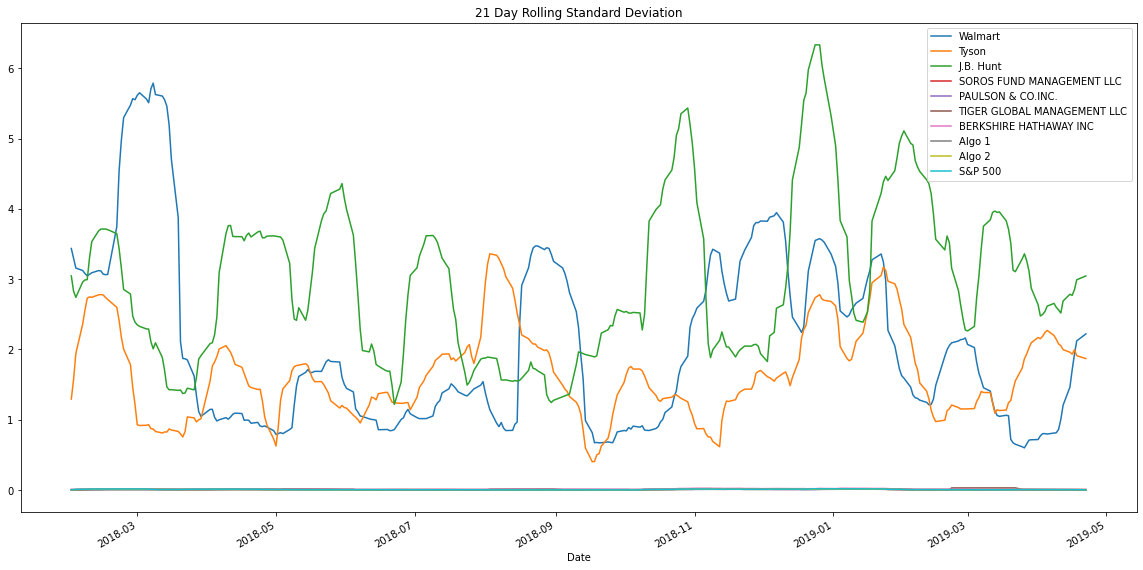

In [171]:
# Rolling
combined_rolling_std = all_stock_data.rolling(window=21).std()
combined_rolling_std.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [172]:
# Annualized Sharpe Ratios
combined_sharpe_ratio = all_stock_data.mean()/all_stock_data.std()
combined_sharpe_ratio

Walmart                        14.821062
Tyson                           9.662170
J.B. Hunt                      11.585833
SOROS FUND MANAGEMENT LLC       0.011388
PAULSON &amp; CO.INC.              -0.008346
TIGER GLOBAL MANAGEMENT LLC    -0.086117
BERKSHIRE HATHAWAY INC          0.031194
Algo 1                          0.120319
Algo 2                          0.017727
S&amp;P 500                        -0.020217
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f962c3e3df0&gt;

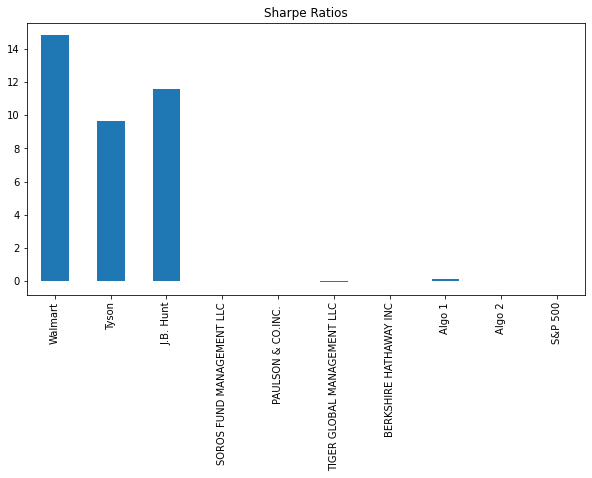

In [173]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot.bar(figsize=(10,5), title="Sharpe Ratios")

In [174]:
# Create a correlation analysis
combined_price_correlation = all_stock_data.corr()
combined_price_correlation.head()

,Walmart,Tyson,J.B. Hunt,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Walmart,1.000000,0.028372,-0.376068,0.084668,0.006647,-0.012993,0.051961,0.057201,0.042571,0.046005
Tyson,0.028372,1.000000,0.508844,0.040439,0.019870,0.037039,0.077688,-0.090034,0.081591,-0.000183
J.B. Hunt,-0.376068,0.508844,1.000000,0.028103,0.075235,0.061691,0.005785,-0.072241,0.060552,0.030728
SOROS FUND MANAGEMENT LLC,0.084668,0.040439,0.028103,1.000000,0.778143,0.525111,0.795831,0.328838,0.841723,0.001779
PAULSON & CO.INC.,0.006647,0.019870,0.075235,0.778143,1.000000,0.532483,0.668457,0.339523,0.807513,-0.019466


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9626d953a0&gt;

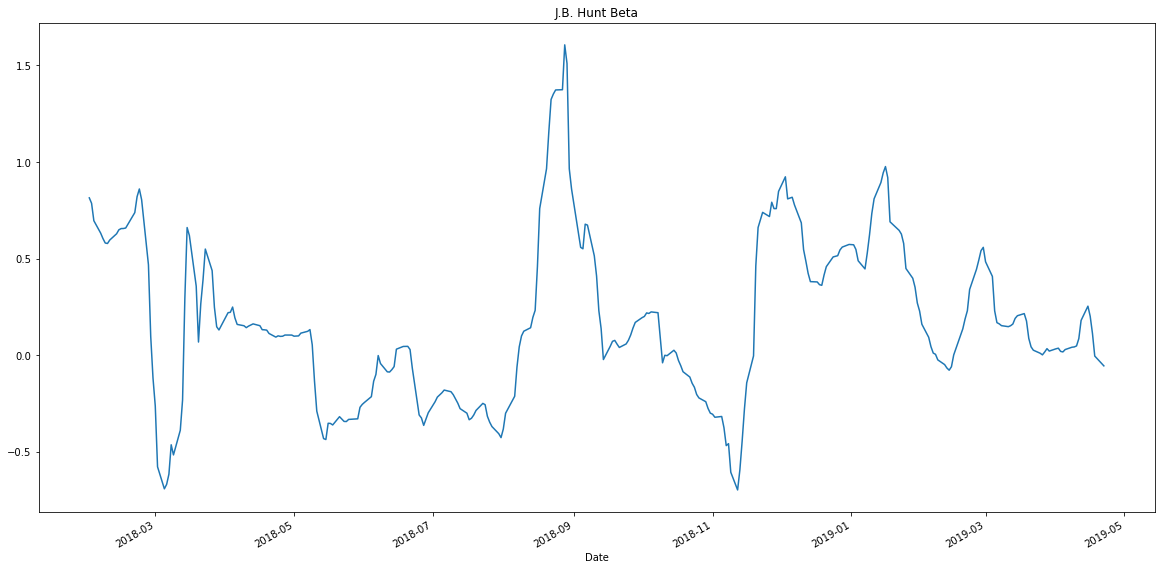

In [175]:
# Beta
new_covariance = all_stock_data['J.B. Hunt'].rolling(window=21).cov(all_stock_data['Walmart'])
new_variance = all_stock_data['J.B. Hunt'].rolling(21).var()
jbht_beta = new_covariance/new_variance
jbht_beta.plot(figsize=(20,10), title="J.B. Hunt Beta")